In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../data/processed/data.csv')

In [33]:
df.shape

(8807, 9)

In [34]:
df.head()

,Unnamed: 0,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,0,Royal Enfield Bullet Electra 350cc 2011,2011,38998.0,first,bangalore,40,19.8,95000.0
1,1,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30,197500.0
2,2,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72,7.0,9000.0
3,3,KTM Duke 200cc 2012,2012,24561.0,third,bangalore,35,25,63400.0
4,4,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,first,hyderabad,40,20.21,130500.0


In [35]:
df.describe()

,Unnamed: 0,model_year,kms_driven,price
count,8807.000000,8807.000000,6447.000000,8.772000e+03
mean,4461.348132,2015.296923,24227.728711,8.458634e+04
std,2570.509412,3.780764,30137.639084,7.774293e+04
min,0.000000,1950.000000,0.000000,2.000000e+03
25%,2238.500000,2014.000000,9500.000000,4.000000e+04
50%,4464.000000,2016.000000,18000.000000,7.000000e+04
75%,6686.500000,2018.000000,30000.000000,1.150000e+05
max,8916.000000,2021.000000,1000000.000000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [36]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [37]:
df.sample(5)

,Unnamed: 0,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
7458,7545,Kawasaki Ninja 650cc 2014,2014,9106.0,first,thane,21,67.20,230000.0,Kawasaki
3120,3167,Honda CBF Stunner 125cc 2008,2008,NaN,first,ahmedabad,65,11,16500.0,Honda
8425,8528,TVS Apache RTR 200 4V Carburetor 2017,2017,NaN,first,ahmedabad,40,20.70,65000.0,TVS
6888,6970,Hero Honda Splendor 100cc 2011,2011,2897.0,first,faridabad,45-60,6.15kw (8.36 ps),12000.0,Hero
4630,4694,Honda CB Hornet 160R CBS 2018,2018,NaN,first,meerut,52,15.44,45000.0,Honda


In [38]:
df.brand.value_counts()

Bajaj               2488
Royal               1964
Hero                 997
Yamaha               893
TVS                  675
Honda                623
KTM                  591
Suzuki               256
UM                   135
Jawa                  54
Mahindra              38
Harley-Davidson       34
Hyosung               14
Husqvarna             13
Kawasaki               7
Benelli                7
BenelliImperiale       6
Fb                     4
Ducati                 3
Triumph                2
MV                     1
BMW                    1
yamaha                 1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [39]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [40]:
df.sample(5)

,Unnamed: 0,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
7410,7497,Royal Enfield Classic Chrome 500cc 2013,2013,26739.0,first,pune,32,27.20,105000.0,Royal,500
3990,4046,Royal Enfield Electra 350cc 2009,2009,24200.0,first,delhi,37,19,60000.0,Royal,350
5599,5673,Hero CBZ Xtreme 150cc 2013,2013,28500.0,first,gurgaon,65,14.4ps,29999.0,Hero,150
7145,7230,Bajaj V15 150cc 2016,2016,22139.0,first,delhi,57,11.80,48000.0,Bajaj,150
3483,3533,Hero HF Deluxe 100cc 2013,2013,25000.0,first,jaipur,83,7.70,25000.0,Hero,100


### We can now drop the model_name feature

In [41]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [42]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [43]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [44]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [45]:
df.owner.unique()

array(['first', 'third', 'second', 'fourth'], dtype=object)

In [46]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [47]:
df.location.value_counts()[:10]

delhi        1583
mumbai        882
bangalore     843
pune          423
chennai       401
hyderabad     373
gurgaon       356
jaipur        351
ahmedabad     300
faridabad     189
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [48]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'mumbai', 'bangalore', 'pune', 'chennai'], dtype='object')


In [49]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [50]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 23


Bajaj     2488
Royal     1964
Hero       997
Yamaha     893
TVS        675
Honda      623
KTM        591
Suzuki     256
UM         135
Jawa        54
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [51]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [52]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [53]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [54]:
df.sample(4)

,Unnamed: 0,kms_driven,owner,location,mileage,power,price,brand,engine,age
3624,3678,16000.0,first,other,35,27.20,221000.0,Royal Enfield,500,3
40,40,NaN,first,mumbai,58,13,47475.0,Yamaha,150,4
8609,8715,NaN,first,other,35,23.19,40000.0,Bajaj,None,8
2814,2858,20000.0,first,delhi,35,24.80,70000.0,UM,None,3


# Outlier Detection

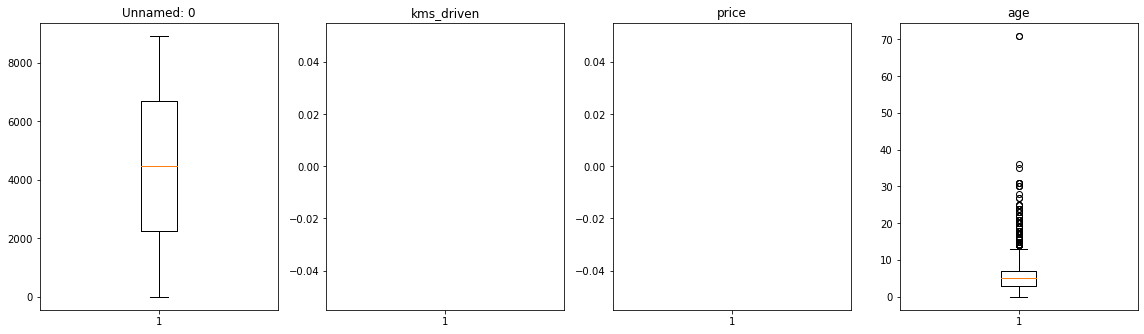

In [55]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

## kms_driven

In [56]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [57]:
df.shape

(5745, 10)

<AxesSubplot:>

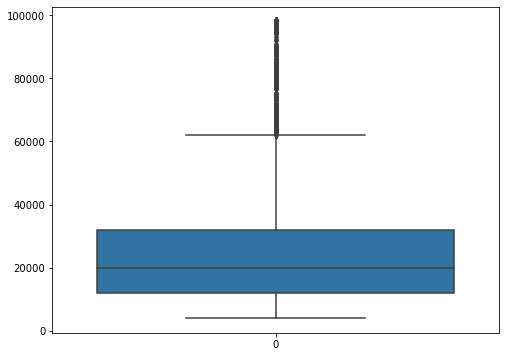

In [58]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [59]:
# max_val = df['mileage'].quantile(.99)

# min_val = df['mileage'].quantile(.1)

# df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

In [60]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

TypeError: Vertical orientation requires numeric `y` variable.

<Figure size 576x432 with 0 Axes>

## Power

In [ ]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

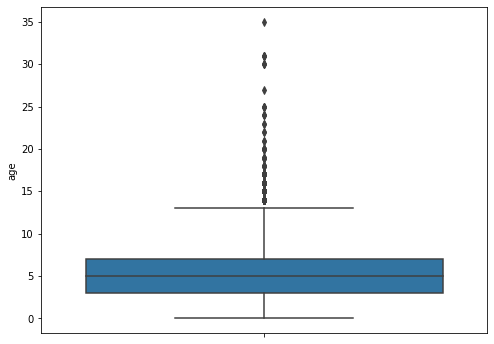

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [ ]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
7417,9500.0,first,mumbai,35.0,25.0,196500.0,UM,None,3
2625,26000.0,first,other,40.0,24.2,62000.0,Bajaj,None,6
6960,13500.0,first,other,55.0,8.9,14000.0,Hero,125,11


In [ ]:
df = df[df['age'] <= 20]

In [ ]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1402,34000.0,second,chennai,37.0,19.8,85000.0,Royal Enfield,350,7
1419,9500.0,first,pune,22.0,33.0,198500.0,TVS,None,2
4070,13000.0,first,other,NaN,30.0,210000.0,Honda,None,0


<AxesSubplot:ylabel='age'>

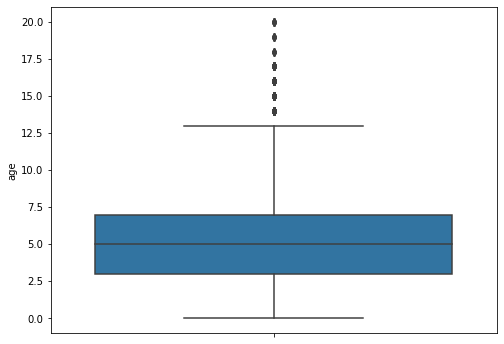

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [ ]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

# df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

In [61]:
df[~(df['price'] <= max_val) & (df['price'] > min_val)]

,Unnamed: 0,kms_driven,owner,location,mileage,power,price,brand,engine,age
6,6,25300.0,first,pune,25,42.90,173900.0,KTM,390,4
12,12,6000.0,first,delhi,35,19.1,188800.0,Royal Enfield,350,1
13,13,7500.0,first,other,55.47,15,100500.0,Hero,None,1
15,15,35000.0,first,other,35,19.80,121000.0,Royal Enfield,350,5
17,17,13562.0,first,delhi,35,19.80,125000.0,Royal Enfield,350,3
...,...,...,...,...,...,...,...,...,...,...
8791,8900,37000.0,first,other,25,27.20,110000.0,Royal Enfield,500,7
8792,8901,26000.0,first,mumbai,35,19.80,102000.0,Royal Enfield,350,6
8793,8902,15000.0,first,bangalore,35,24.60,145000.0,KTM,200,4
8794,8903,5200.0,first,delhi,32,27.20,120000.0,Royal Enfield,500,7


<AxesSubplot:ylabel='price'>

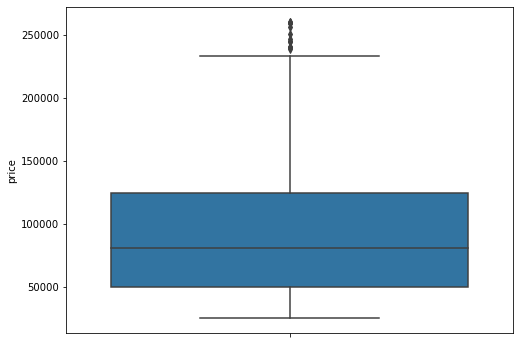

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [ ]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
559,8941.0,first,delhi,NaN,14.6,82000.0,Suzuki,150,2
340,29000.0,first,mumbai,63.0,14.0,41000.0,Suzuki,150,6
3423,16000.0,first,delhi,25.0,27.2,82000.0,Royal Enfield,500,7
2110,26000.0,first,other,84.0,8.2,30300.0,Hero,100,6
1707,9000.0,first,pune,35.0,24.8,120000.0,UM,None,4


In [ ]:
df.shape

(5015, 9)

In [ ]:
df.isnull().sum()

kms_driven      0
owner           0
location        0
mileage       612
power         237
price           0
brand           0
engine        971
age             0
dtype: int64

In [ ]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [ ]:
df.shape

(5015, 9)

## Save

In [ ]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)